## Iris 데이터셋 k-means clustering 예제

#### 라이브러리 및 패키지 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

#### 데이터 불러오기

In [2]:
# 데이터 로드
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
target_names = iris.target_names

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 최적의 k값 찾기

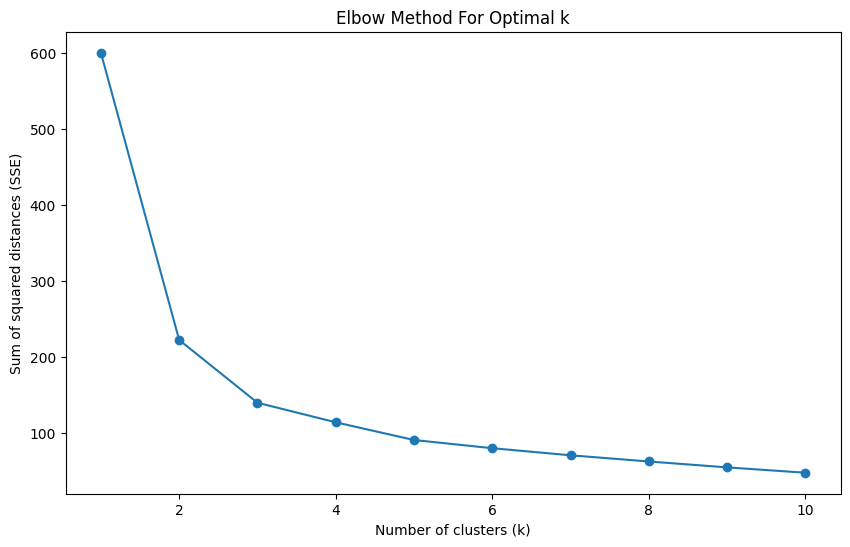

In [3]:
# 최적의 K값 찾기 (Elbow Method)
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Elbow Method 시각화
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

#### K-means clustering 적용

In [4]:
# 최적의 K값 선택 (Elbow Method 결과에 따라)
optimal_k = 3  # 여기서는 Elbow Method 결과를 보고 k=3을 선택
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

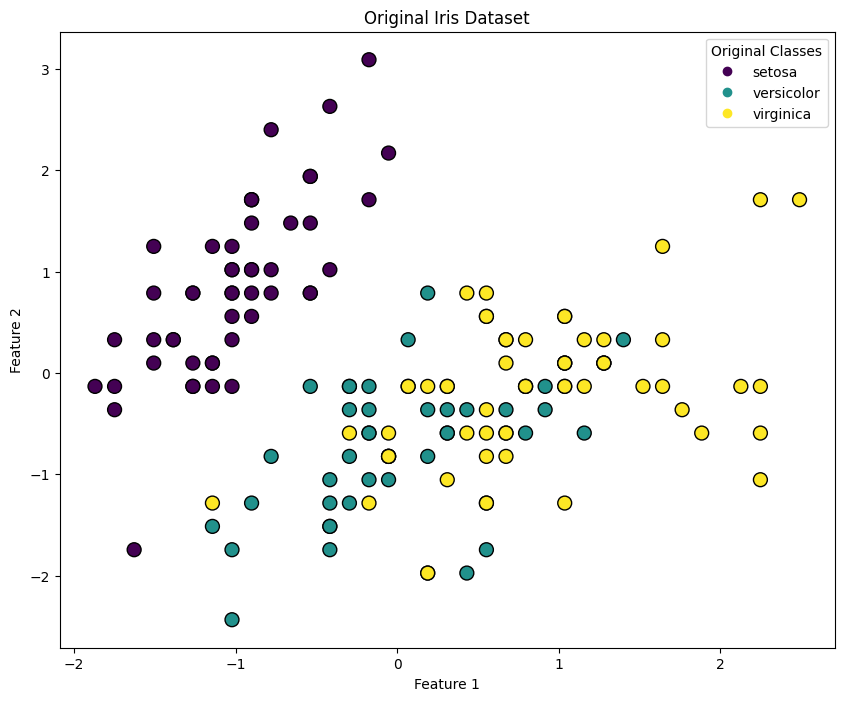

In [5]:
# 원본 데이터 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
handles, labels = scatter.legend_elements(prop="colors")
labels = [target_names[int(re.sub(r'[^0-9]', '',label))] for label in labels]
plt.legend(handles, labels, title="Original Classes")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Iris Dataset')
plt.show()

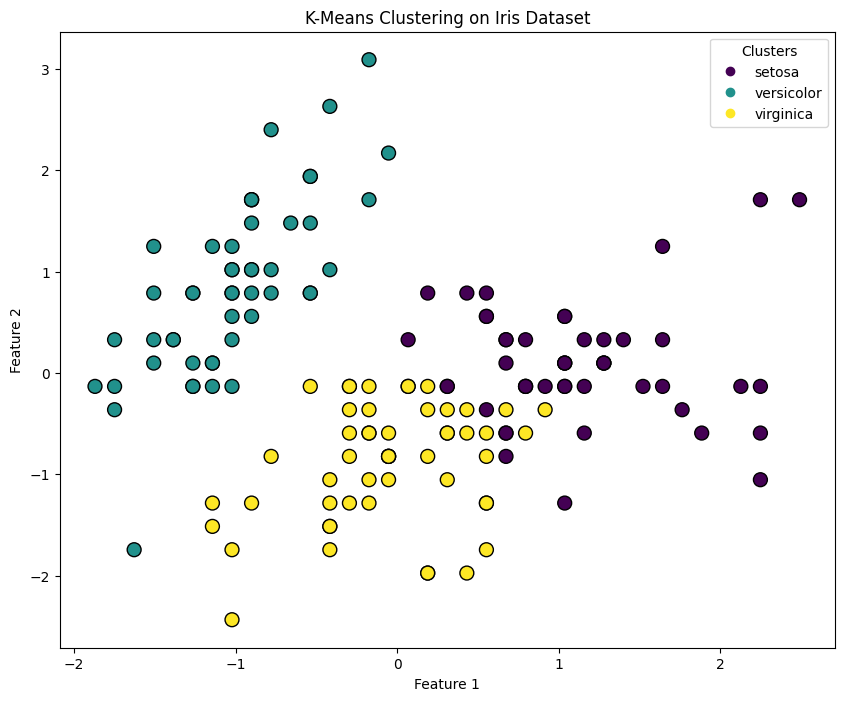

In [8]:
# K-Means 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=100)
handles, labels = scatter.legend_elements(prop="colors")
labels = [target_names[int(re.sub(r'[^0-9]', '',label))] for label in labels]
plt.legend(handles, labels, title="Clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.show()

In [7]:
# 실루엣 스코어 계산
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg}')

Silhouette Score for k=3: 0.45994823920518635
